# Import Libraries

In [3]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#import fully merged data frame 
df_fullmerged=pd.read_pickle(r'/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_cus_merged.pkl')

In [5]:
#display all columns as rows 
pd.options.display.max_rows = None
pd.options.display.max_columns = None 

In [6]:
#check data frame 
df_fullmerged.head()

,user_id,First Name,Last Name,Gender,State,Age,Date Joined,number of dependants,Family Status,Income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,6184,2,1,Clementines,32,4,4.3,both,Low-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,47402,3,0,Fuji Apples,24,4,7.1,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Busiest day,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer


# Consider any security implications that might exist for this new data.
The data frame contians 'personal identifiable information(PII) such as: 'user_id' 'first name and last name', 'Gender' , 'age', 'state', individually the columns don't pose a risk but i could solve this in 2 ways. #1. drop the first and last name columns . #2. Aggregate the date where possible, replace state with regions.

In [8]:
#dropping first and last name columns
df_fullmerged = df_fullmerged.drop(columns=['First Name', 'Last Name'])

In [9]:
#checking to see if columns have been dropped 
df_fullmerged.head()

,user_id,Gender,State,Age,Date Joined,number of dependants,Family Status,Income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,6184,2,1,Clementines,32,4,4.3,both,Low-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,47402,3,0,Fuji Apples,24,4,7.1,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Busiest day,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer


#  Create a regional segmentation of the data.

In [11]:
result = []
for value in df_fullmerged['State']:
    if value in ('Maine'	'New Hampshire'	'Vermont'	'Massachusetts'	'Rhode Island'	'Connecticut'	'New York'	'Pennsylvania'	'New Jersey'
) :
        result.append('Northeast')
    elif value in ('Wisconsin'	'Michigan'	'Illinois'	'Indiana'	'Ohio'	'North Dakota'	'South Dakota'	'Nebraska'	'Kansas'	'Minnesota'	'Iowa'	'Missouri'
) :
        result.append('Midwest')
    elif value in ('Delaware'	'Maryland'	'District of Columbia'	'Virginia'	'West Virginia'	'North Carolina'	'South Carolina'	'Georgia'	'Florida'	'Kentucky'	'Tennessee'	'Mississippi'	'Alabama'	'Oklahoma'	'Texas'	'Arkansas'	'Louisiana'
) :
        result.append('South')
    elif value in ('Idaho'	'Montana'	'Wyoming'	'Nevada'	'Utah'	'Colorado'	'Arizona'	'New Mexico'	'Alaska'	'Washington'	'Oregon'	'California'	'Hawaii'
) :
        result.append('West')
    else :
        result.append('Not a region')

In [12]:
#Assigning the values in result[] to new column Region
df_fullmerged['region']=result

In [13]:
df_fullmerged['region'].value_counts()

region
South        10099817
West          7765088
Midwest       7107586
Northeast     5356272
Name: count, dtype: int64

In [14]:
# check to see table 
df_fullmerged.head()

,user_id,Gender,State,Age,Date Joined,number of dependants,Family Status,Income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,6184,2,1,Clementines,32,4,4.3,both,Low-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,47402,3,0,Fuji Apples,24,4,7.1,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Busiest day,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest


# Determining whether there’s a difference in spending habits between the different U.S. regions. 

In [16]:
#create a cross tab to compare spending habits accross regions 
crosstab = pd.crosstab(df_fullmerged['region'], df_fullmerged['spending_flag'], dropna = False)

In [17]:
crosstab.to_clipboard()

In [18]:
# Print the crosstab
print(crosstab)

spending_flag  High spender  Low spender
region                                  
Midwest              148321      6959265
Northeast            102905      5253367
South                197110      9902707
West                 149922      7615166


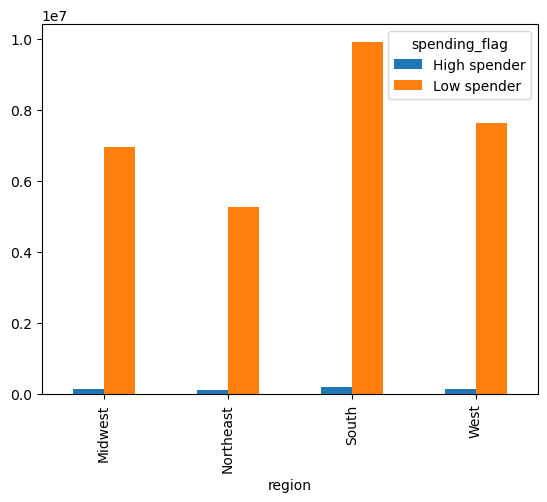

In [19]:
#create a bar chart to better compare spending habits
bar_reg_com = crosstab.plot.bar()

# The South and West show higher overall customer activity compared to the Midwest and Northeast, but the majority of customers in all regions are low spenders, indicating spending habits are similar regardless of region.

In [21]:
#export bar chart of regional spending comparison
bar_reg_com.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/reg_compared_spending.png')

# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# Create a flag for customers with less than 5 orders
df_fullmerged.loc[df_fullmerged['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
df_fullmerged.loc[df_fullmerged['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [24]:
#check to see frequency
df_fullmerged['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    29303281
low-activity customer      1025482
Name: count, dtype: int64

In [25]:
# Exclude low-activity customers from dataframe
df_filtered = df_fullmerged[df_fullmerged['activity_flag'] == 'high-activity customer']

In [26]:
df_filtered['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    29303281
Name: count, dtype: int64

In [27]:
#export high activity data frame
df_filtered.to_pickle('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/02 Data/Prepared Data/High_activity_customers.pkl')

# Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents & Create an appropriate visualization to show the distribution of profiles.

# AGE

In [30]:
# creating age flag 
df_filtered.loc[df_filtered['Age'] <= 25, 'Age_group'] = 'Young adult'
df_filtered.loc[(df_filtered['Age'] > 25) & (df_filtered['Age'] <= 44), 'Age_group'] = 'Adult'
df_filtered.loc[(df_filtered['Age'] > 44) & (df_filtered['Age'] <= 64), 'Age_group'] = 'Middle-aged'
df_filtered.loc[df_filtered['Age'] > 64, 'Age_group'] = 'Senior'

/var/folders/g0/3g_bmqwx1ks0wzpxgh5vgbfm0000gn/T/ipykernel_72621/1960253555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[df_filtered['Age'] <= 25, 'Age_group'] = 'Young adult'


In [31]:
#check to see frequency count of new 'Age group' column 
df_filtered['Age_group'].value_counts(dropna = False)

Age_group
Middle-aged    9169173
Adult          8722963
Senior         7754560
Young adult    3656585
Name: count, dtype: int64

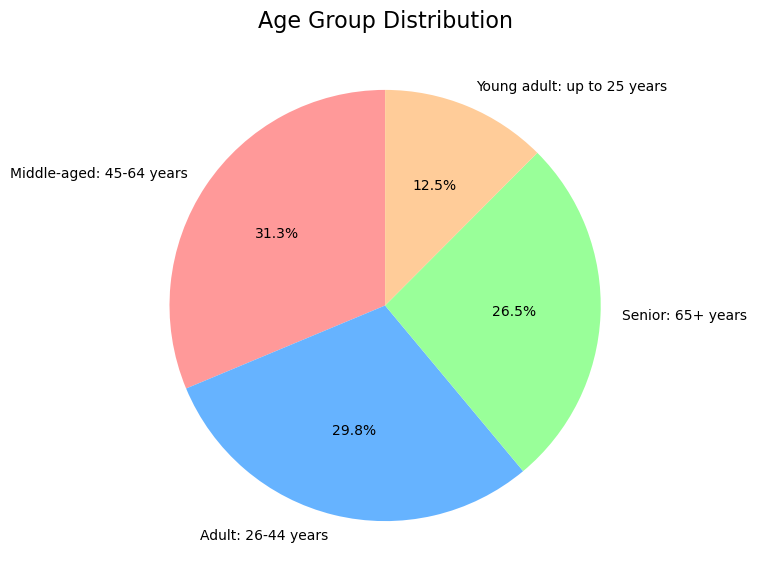

In [32]:
# Plot age group pie chart distribution
age_group_dist_pie_chart=df_filtered['Age_group'].value_counts().plot(
    kind='pie',
    labels= ['Middle-aged: 45-64 years', 'Adult: 26-44 years', 'Senior: 65+ years', 'Young adult: up to 25 years'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
    figsize=(7, 7)
)
plt.title('Age Group Distribution', fontsize=16)
plt.ylabel('')  # Remove y-axis label for cleaner look
plt.show()

In [33]:
#Export age group distribution pie chart
age_group_dist_pie_chart.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/age_group_pie_chart.png')

# Income

In [35]:
# Create an income group flag
df_filtered.loc[df_filtered['Income'] <= 55000, 'income_group'] = 'low-income'
df_filtered.loc[(df_filtered['Income'] > 55000) & (df_filtered['Income'] <= 150000), 'income_group'] = 'middle-income'
df_filtered.loc[df_filtered['Income'] > 150000, 'income_group'] = 'high-income'

/var/folders/g0/3g_bmqwx1ks0wzpxgh5vgbfm0000gn/T/ipykernel_72621/1664271635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[df_filtered['Income'] <= 55000, 'income_group'] = 'low-income'


In [36]:
# Check the frquency of income groups
income_group_labels=df_filtered['income_group'].value_counts(dropna = False)

In [37]:
income_group_labels

income_group
middle-income    21414125
low-income        4199182
high-income       3689974
Name: count, dtype: int64

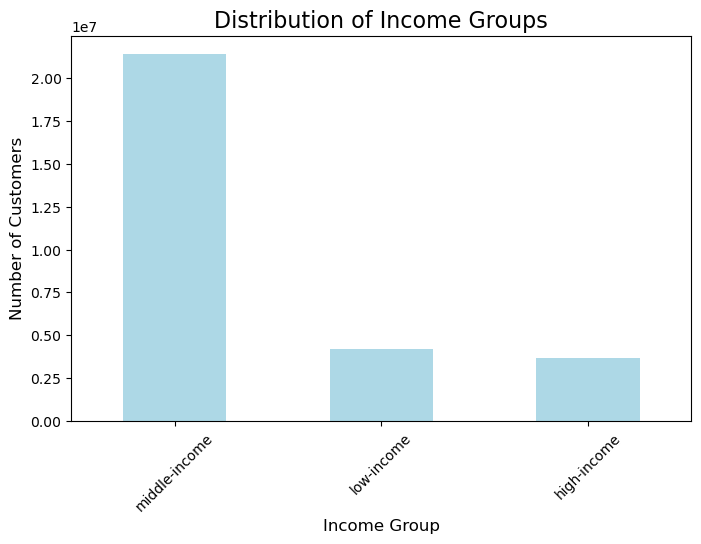

In [38]:
# Plot the income_group_labels bar chart
income_group_bar=income_group_labels.plot(kind='bar', color='lightblue', figsize=(8, 5))
plt.title('Distribution of Income Groups', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [39]:
#export income group bar chart 
income_group_bar.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/income_group_bar_chart.png')

# Dependants

In [41]:
# Create a dependents flag
df_filtered.loc[df_filtered['number of dependants'] == 0, 'dependants_flag'] = 'no dependants'
df_filtered.loc[df_filtered['number of dependants'] >= 1, 'dependants_flag'] = 'has dependants'

/var/folders/g0/3g_bmqwx1ks0wzpxgh5vgbfm0000gn/T/ipykernel_72621/2910874718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[df_filtered['number of dependants'] == 0, 'dependants_flag'] = 'no dependants'


In [42]:
# Check the frquency of dependant groups
dependant_frq=df_filtered['dependants_flag'].value_counts(dropna = False)

In [43]:
dependant_frq

dependants_flag
has dependants    21978394
no dependants      7324887
Name: count, dtype: int64

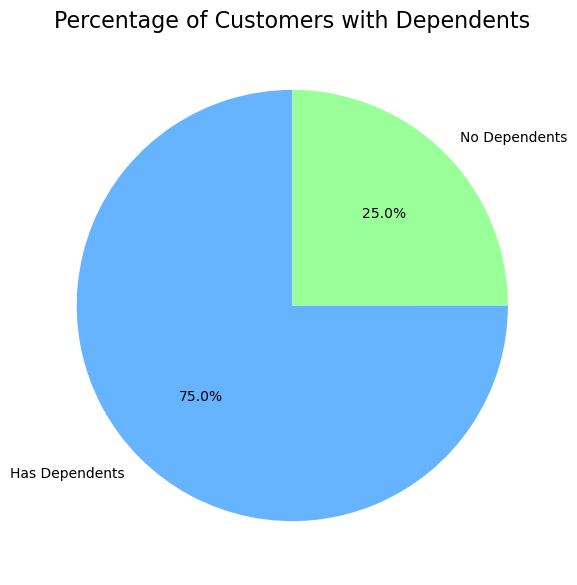

In [44]:
# Plot the pie chart
dependant_proportion=dependant_frq.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99'],
    labels=['Has Dependents', 'No Dependents'],
    figsize=(7, 7),
    textprops={'fontsize': 10}
)
plt.title('Percentage of Customers with Dependents', fontsize=16)
plt.ylabel('')  # Remove default y-axis label
plt.show()

In [45]:
#export dependant proportion of total
dependant_proportion.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/dependant_proportion_pie_chart.png')

In [46]:
df_filtered.head()

,user_id,Gender,State,Age,Date Joined,number of dependants,Family Status,Income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,order_frequency_flag,region,activity_flag,Age_group,income_group,dependants_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,high-activity customer,Middle-aged,high-income,has dependants
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,high-activity customer,Middle-aged,high-income,has dependants
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,6184,2,1,Clementines,32,4,4.3,both,Low-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,high-activity customer,Middle-aged,high-income,has dependants
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,47402,3,0,Fuji Apples,24,4,7.1,both,Mid-range product,Regularly busy,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,high-activity customer,Middle-aged,high-income,has dependants
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy,Busiest day,Average orders,8,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,high-activity customer,Middle-aged,high-income,has dependants


# Region vs Spending flag 

In [48]:
#crosstab region vs spending flag
region_spending_cross=pd.crosstab(df_filtered['region'], df_filtered['spending_flag'], normalize='index') * 100

In [49]:
region_spending_cross

spending_flag,High spender,Low spender
region,,
Midwest,2.060576,97.939424
Northeast,1.896417,98.103583
South,1.924623,98.075377
West,1.903538,98.096462


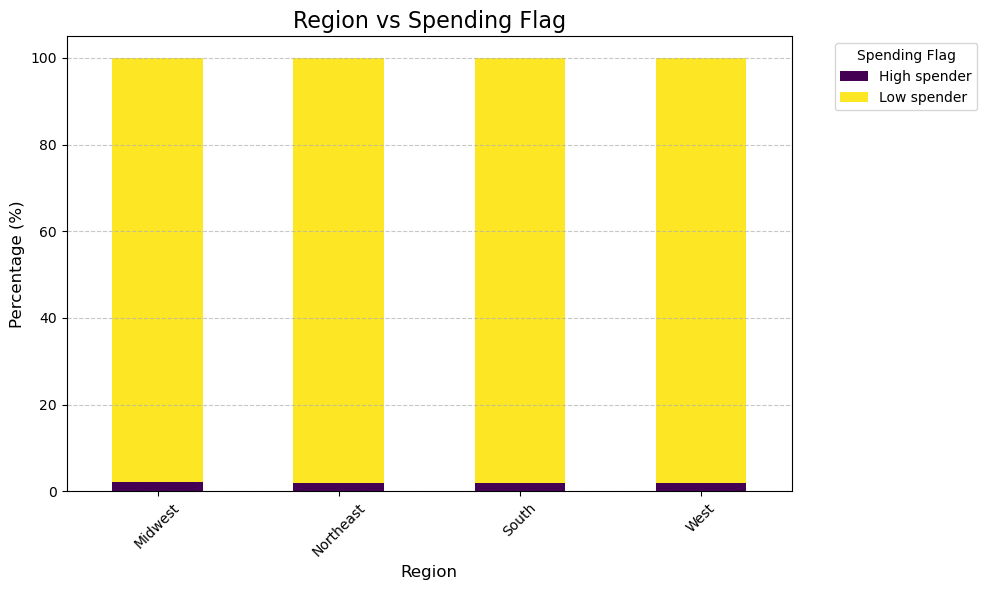

In [50]:
# Plot the stacked bar chart
region_vs_spending=region_spending_cross.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

# Add titles and labels
plt.title('Region vs Spending Flag', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Spending Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
#export Region vs Spending cross table 
region_vs_spending.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/region_vs_spending.png')

# Loyalty flag vs Age group cross 

In [53]:
#loyalty vs age group
loyalty_age_crosstab = pd.crosstab(df_filtered['loyalty_flag'], df_filtered['Age_group'],normalize='columns') * 100

In [54]:
loyalty_age_crosstab

Age_group,Adult,Middle-aged,Senior,Young adult
loyalty_flag,,,,
Loyal customer,34.303046,34.602488,34.477598,34.370622
New customer,13.996528,14.106867,14.145561,14.081117
Regular customer,51.700426,51.290645,51.376841,51.548262


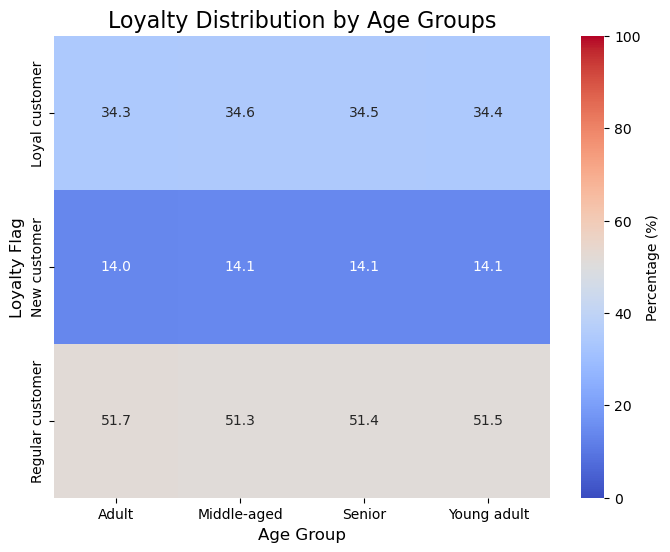

In [55]:
# Heatmap visualization
loyalty_vs_age_group_heat_map=plt.figure(figsize=(8, 6))
sns.heatmap(loyalty_age_crosstab, 
            annot=True, 
            fmt=".1f", 
            cmap="coolwarm", 
            cbar_kws={'label': 'Percentage (%)'}, 
            vmin=0, vmax=100)  # Force color bar to range from 0% to 100%

plt.title('Loyalty Distribution by Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Loyalty Flag', fontsize=12)
plt.show()


In [56]:
#export loyalty vs Age groups heat maps
loyalty_vs_age_group_heat_map.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_vs_age_groups.png')

# Spending VS Age groups

In [58]:
# Crosstab for Spending Flag vs. Age Groups
spending_age_crosstab = pd.crosstab(df_filtered['spending_flag'], df_filtered['Age_group'], dropna= False)

In [59]:
spending_age_crosstab

Age_group,Adult,Middle-aged,Senior,Young adult
spending_flag,,,,
High spender,164396,188245,147235,70398
Low spender,8558567,8980928,7607325,3586187


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

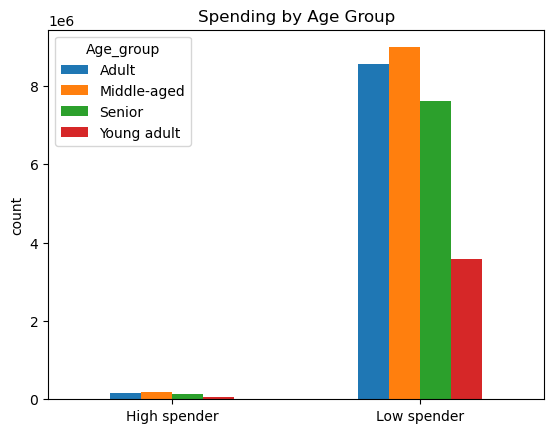

In [60]:
# bar chart visualisation 
spending_vs_age_bar = spending_age_crosstab.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [61]:
#export spending vs Age groups heat maps
spending_vs_age_bar.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/spening_vs_age.png')

In [62]:
age_family_crosstab = pd.crosstab(df_filtered['loyalty_flag'], df_filtered['Family Status'])
age_family_crosstab

Family Status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal customer,866431,483813,7070004,1675133
New customer,346819,190565,2904048,684777
Regular customer,1290864,728274,10601690,2460863


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

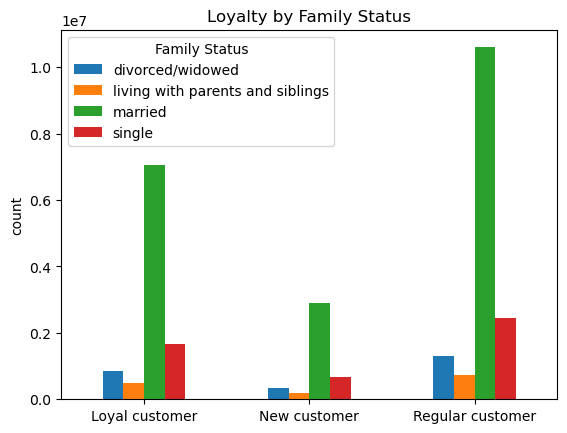

In [63]:
# bar chart
loyalty_fam_bar = age_family_crosstab.plot.bar()
plt.title('Loyalty by Family Status')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [64]:
# Export the chart
loyalty_fam_bar.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_fam_bar.png')

In [65]:
#loyalty vs age group 
loyalty_age_group_crosstab = pd.crosstab(df_filtered['loyalty_flag'], df_filtered['Age_group'])
loyalty_age_group_crosstab

Age_group,Adult,Middle-aged,Senior,Young adult
loyalty_flag,,,,
Loyal customer,2992242,3172762,2673586,1256791
New customer,1220912,1293483,1096926,514888
Regular customer,4509809,4702928,3984048,1884906


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

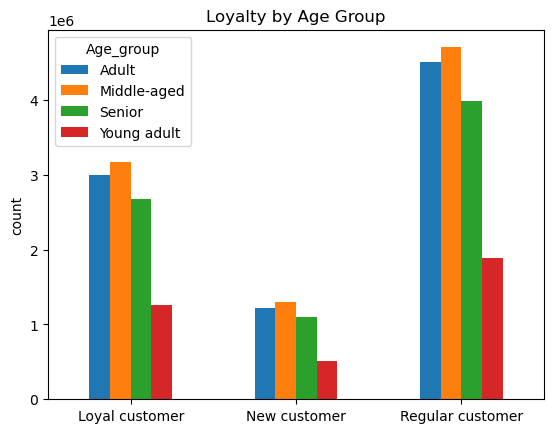

In [66]:
# bar chart
loyalty_agroup_group_bar = loyalty_age_group_crosstab.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [67]:
# Export the chart
loyalty_agroup_group_bar.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_age_group_bar.png')

In [68]:
# Check value counts
fam_status = df_filtered['Family Status'].value_counts(dropna = False)
fam_status

Family Status
married                             20575742
single                               4820773
divorced/widowed                     2504114
living with parents and siblings     1402652
Name: count, dtype: int64

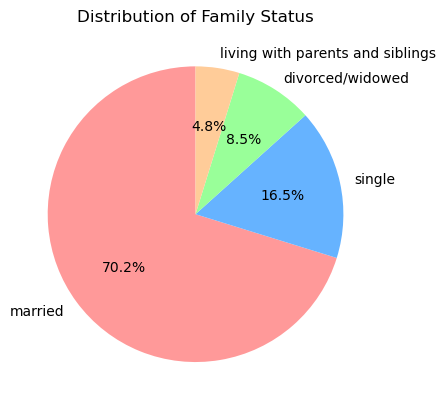

In [69]:
# Pie chart showing the distribution of family status
fam_status_distribution_pie = fam_status.plot.pie(autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Family Status')
plt.show()

In [70]:
# Export the chart
fam_status_distribution_pie.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/fam_status_bar.png')

In [71]:
# Aggregate average price and order frequency by profile
profile_analysis = df_filtered.groupby('income_group').agg({
    'prices': 'mean',
    'order_id': 'count',
}).rename(columns={'prices': 'Average Price', 'order_id': 'Order Frequency'})

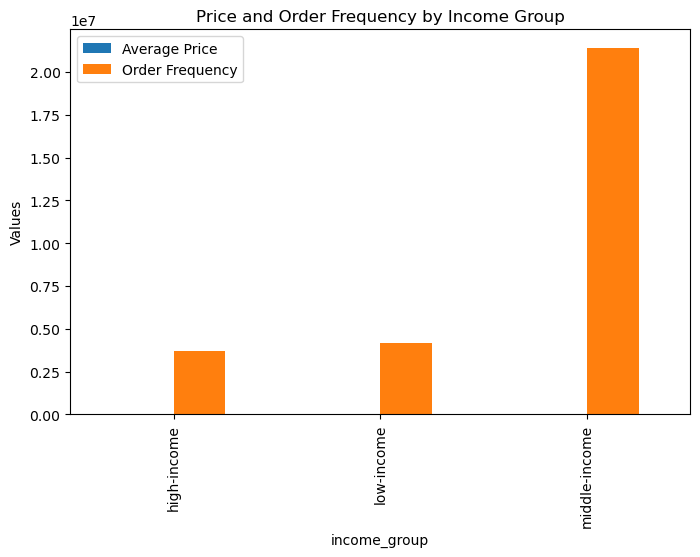

In [82]:
# Visualize with bar chart
profile_analysis=profile_analysis.plot(kind='bar', figsize=(8, 5), title="Price and Order Frequency by Income Group")
plt.ylabel("Values")
plt.show()

In [84]:
# Export the chart
profile_analysis.figure.savefig('/Users/lordsonobire/Documents/Data Immersion/Achievement 4/Instacart Basket Analysis/04 Analysis/Visualizations/profile_analysis.png')